In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
customer_data = pd.read_csv("train.csv")

In [3]:
customer_data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [4]:
info = pd.DataFrame(customer_data.describe(), columns = customer_data.columns)
print(info.head())
print("----------Shape of customer table----------")
print(str(customer_data.shape) + "\n")
print("------ Check whether dataset contains any missing values ------")
print(str(customer_data.isnull().values.any()) + "\n")
print("------ No of missing values present in each column ------")
print(str(customer_data.isnull().sum()) + "\n")
print("------ Total No of missing values in Dataset ------")
print(customer_data.isnull().sum().sum())
print("------ Duplicated Values------")
print(customer_data.duplicated().sum())

       customer_id  customer_visit_score  customer_product_search_score  \
count          NaN          10738.000000                   10696.000000   
mean           NaN             19.060941                       5.274847   
std            NaN              7.419609                       1.882559   
min            NaN              0.568965                      -0.161940   
25%            NaN             13.518021                       3.971587   

       customer_ctr_score  customer_stay_score  customer_frequency_score  \
count        10738.000000         10701.000000              10738.000000   
mean             0.175912             0.374230                  2.376895   
std              0.372829             1.222031                  5.601911   
min             -0.547989            -0.462494                  0.028575   
25%              0.010840            -0.027666                  0.313610   

       customer_product_variation_score  customer_order_score  \
count                      

In [5]:
customer_data["customer_product_search_score"] = customer_data["customer_product_search_score"].replace(np.NaN, customer_data["customer_product_search_score"].median())
customer_data["customer_stay_score"] = customer_data["customer_stay_score"].replace(np.NaN, customer_data["customer_stay_score"].median())
customer_data["customer_product_variation_score"] = customer_data["customer_product_variation_score"].replace(np.NaN, customer_data["customer_product_variation_score"].median())

customer_data["customer_order_score"] = customer_data["customer_order_score"].replace(np.NaN, customer_data["customer_order_score"].median())
customer_data["customer_active_segment"] = customer_data["customer_active_segment"].replace(np.NaN, customer_data["customer_active_segment"].mode()[0])
customer_data["X1"] = customer_data["X1"].replace(np.NaN, customer_data["X1"].mode()[0])
print("------ No of missing values present in each column ------")
print(str(customer_data.isnull().sum()) + "\n")
print("------ different class label values ------")
customer_data['customer_category'].value_counts()

------ No of missing values present in each column ------
customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
customer_category                   0
dtype: int64

------ different class label values ------


0    9443
1    1295
Name: customer_category, dtype: int64

array([[<AxesSubplot:title={'center':'customer_visit_score'}>,
        <AxesSubplot:title={'center':'customer_product_search_score'}>,
        <AxesSubplot:title={'center':'customer_ctr_score'}>],
       [<AxesSubplot:title={'center':'customer_stay_score'}>,
        <AxesSubplot:title={'center':'customer_frequency_score'}>,
        <AxesSubplot:title={'center':'customer_product_variation_score'}>],
       [<AxesSubplot:title={'center':'customer_order_score'}>,
        <AxesSubplot:title={'center':'customer_affinity_score'}>,
        <AxesSubplot:title={'center':'customer_category'}>]], dtype=object)

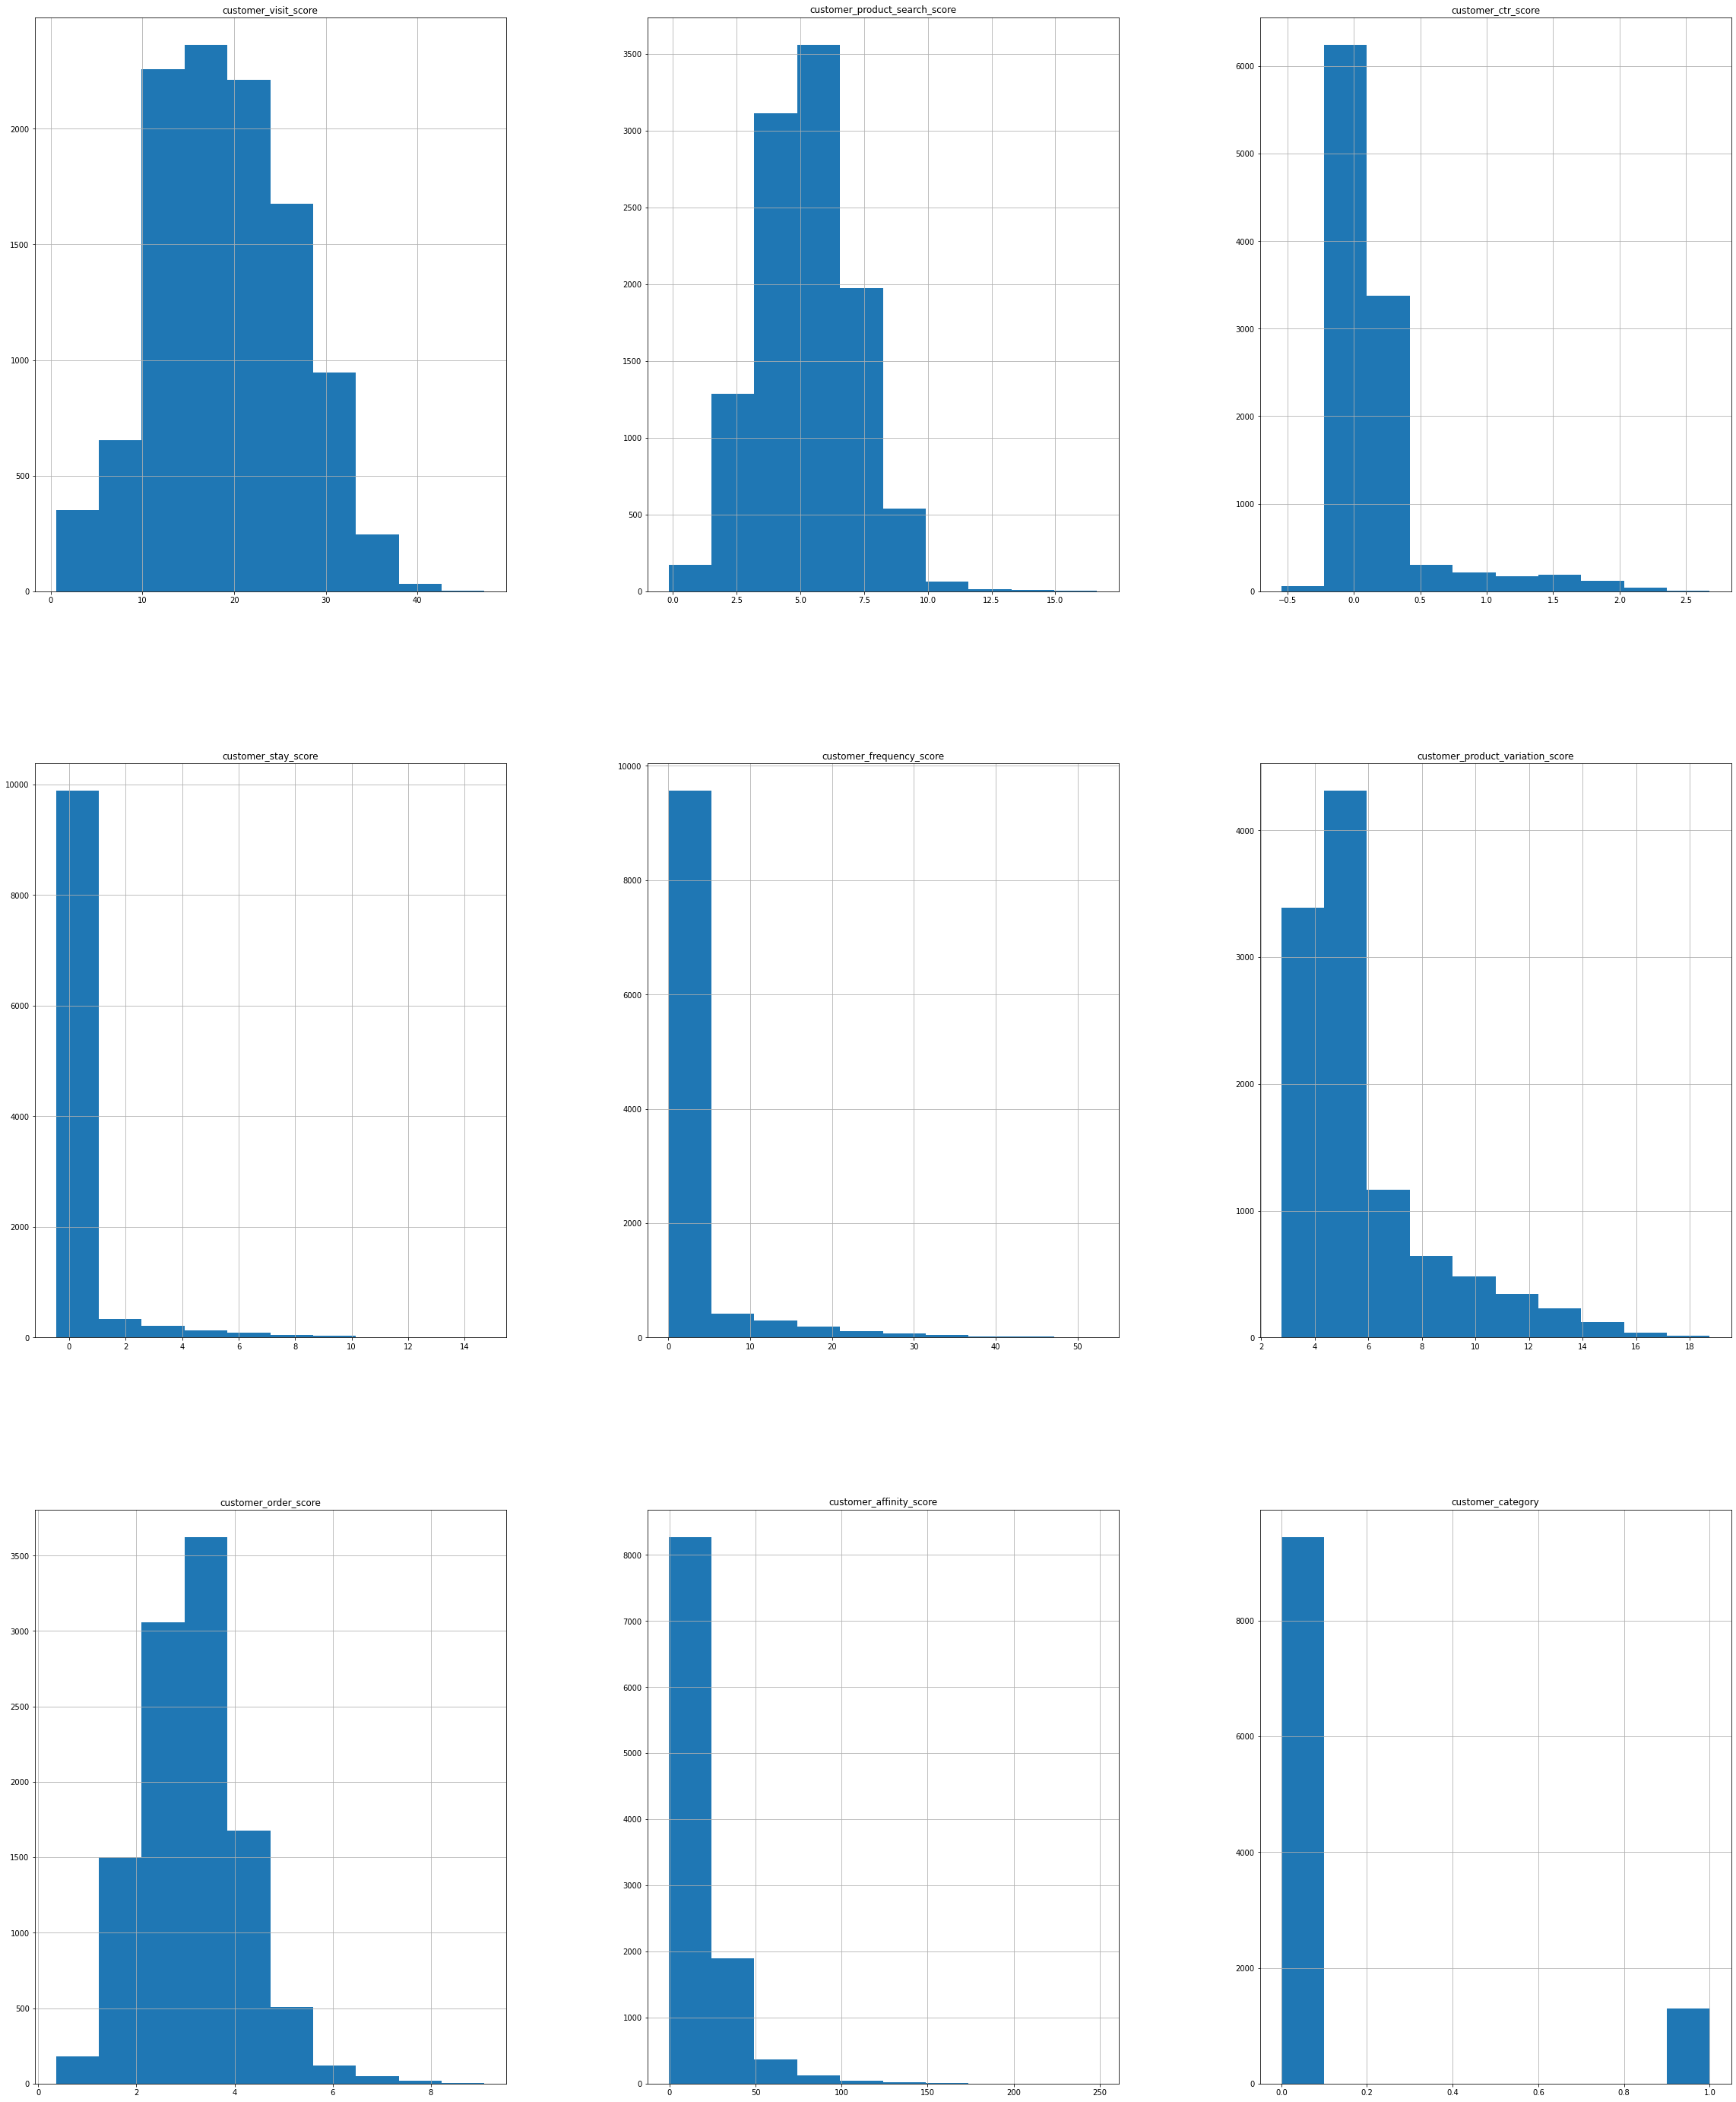

In [6]:
customer_data.hist(figsize = (40,50))

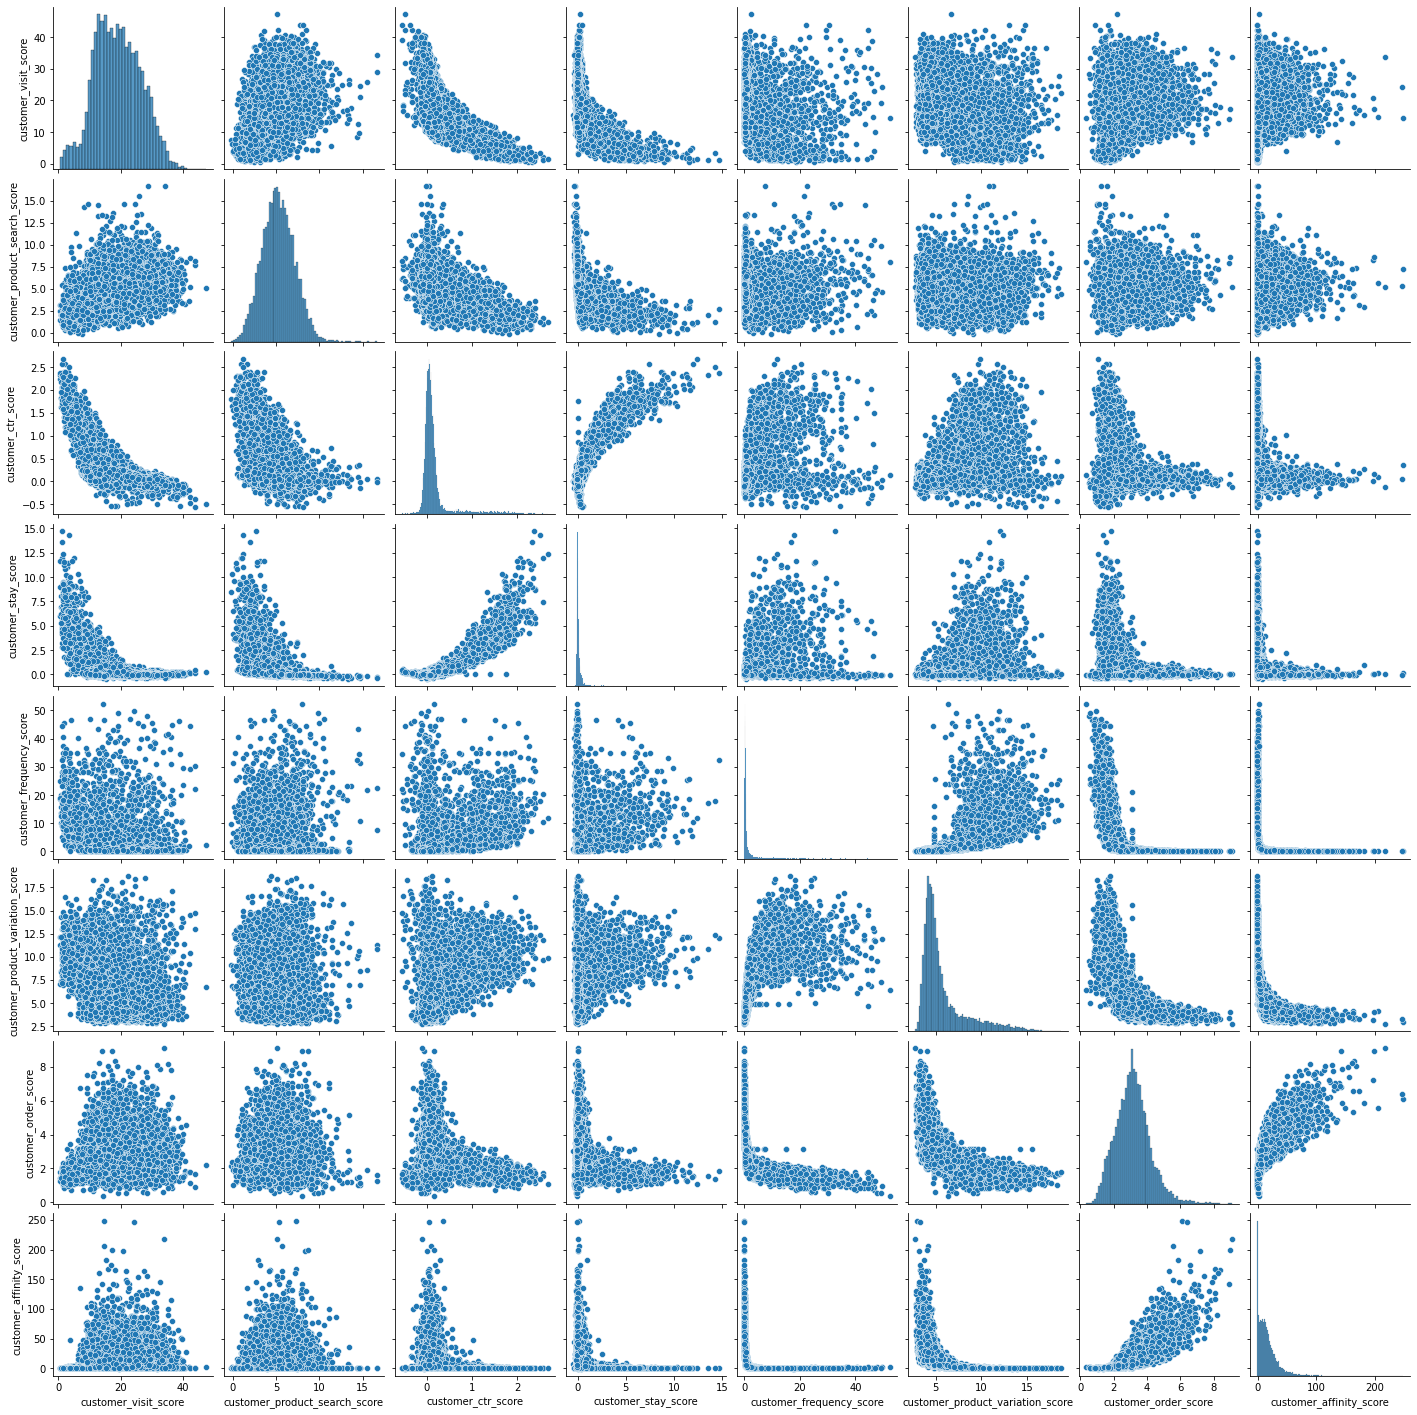

In [7]:
import seaborn as sns
sns.pairplot(customer_data.iloc[:,:-1])

<AxesSubplot:ylabel='customer_category'>

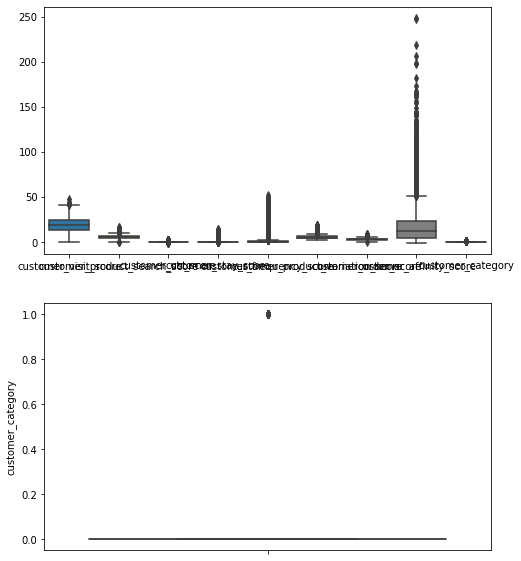

In [8]:
#Distribution of data
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(8,10)
sns.boxplot(data=customer_data,orient="v",ax=axes[0])
sns.boxplot(data=customer_data,y="customer_category",ax=axes[1])

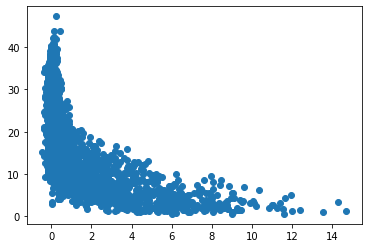

In [9]:
plt.scatter(customer_data["customer_stay_score"], customer_data["customer_visit_score"])

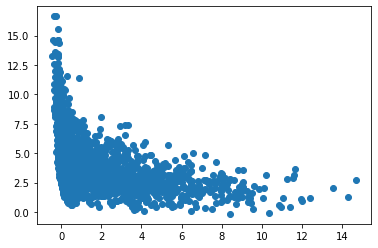

In [10]:
plt.scatter(customer_data["customer_stay_score"], customer_data["customer_product_search_score"])

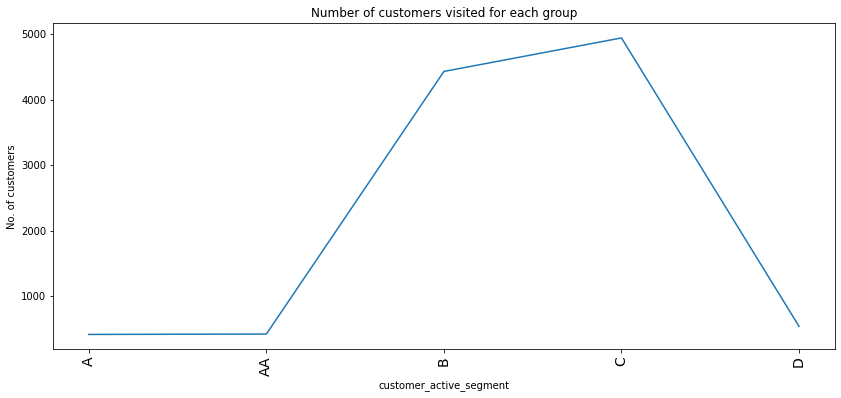

In [11]:
plt.figure(figsize=(14,6))
plt.plot(customer_data.groupby(['customer_active_segment']).groups.keys(), customer_data.groupby(['customer_active_segment'])['customer_id'].count())
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Number of customers visited for each group")
plt.ylabel("No. of customers")
plt.xlabel("customer_active_segment")
plt.show()

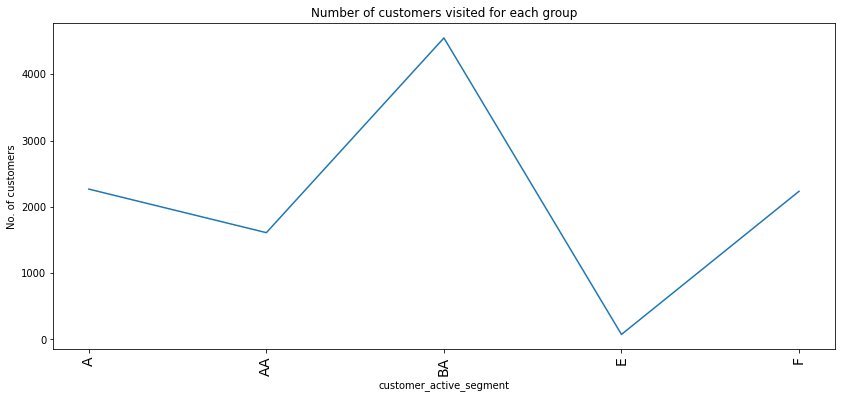

In [12]:
plt.figure(figsize=(14,6))
plt.plot(customer_data.groupby(['X1']).groups.keys(), customer_data.groupby(['X1'])['customer_id'].count())
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Number of customers visited for each group")
plt.ylabel("No. of customers")
plt.xlabel("customer_active_segment")
plt.show()

e:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X1', ylabel='count'>

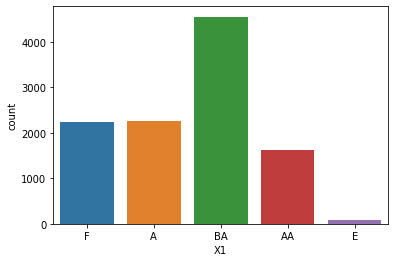

In [13]:
sns.countplot(customer_data['X1'])

e:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_active_segment', ylabel='count'>

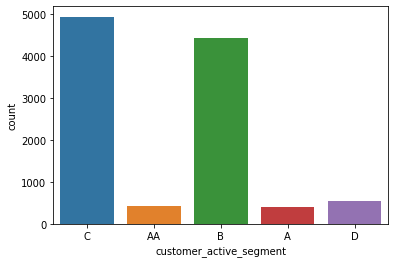

In [14]:
sns.countplot(customer_data['customer_active_segment'])

e:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer_category', ylabel='count'>

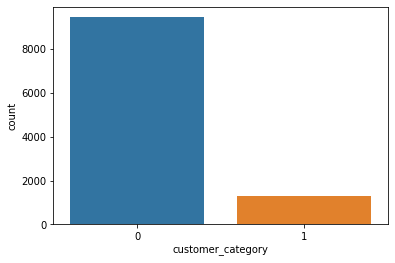

In [15]:
sns.countplot(customer_data["customer_category"])

In [16]:
unique_customer_active_segment = customer_data["customer_active_segment"].unique()
new_list =[]
for i in unique_customer_active_segment:
    new = customer_data[customer_data["customer_active_segment"]==i]
    new_list.append([i,len(new[new["customer_category"]==0]), len(new[new["customer_category"]==1])])
frequency_count = pd.DataFrame(new_list, columns= ["Category", "0","1"])
frequency_count.head()

,Category,0,1
0,C,4316,626
1,AA,416,2
2,B,4146,284
3,A,410,2
4,D,155,381


<BarContainer object of 5 artists>

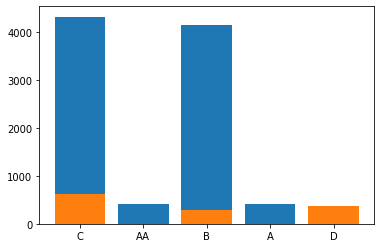

In [17]:
plt.bar(frequency_count["Category"], frequency_count["0"])
plt.bar(frequency_count["Category"], frequency_count["1"])

In [18]:
from sklearn.preprocessing import OneHotEncoder
oneHot_encoded = OneHotEncoder().fit_transform(np.array(customer_data.iloc[:,-3:-1]).reshape((len(customer_data),2))).toarray()
dfEncoded = pd.DataFrame(oneHot_encoded)
data = pd.concat([customer_data, dfEncoded], axis=1, sort=False)
data.head()
print(np.array(customer_data.iloc[:,-3:-1]).reshape((len(customer_data),2)))

[['C' 'F']
 ['C' 'A']
 ['C' 'BA']
 ...
 ['A' 'BA']
 ['B' 'AA']
 ['B' 'A']]


In [19]:
data.drop(['customer_id', 'customer_active_segment', 'X1'], axis='columns', inplace=True)
data.shape

(10738, 19)

In [20]:
X = data.drop(['customer_category'],axis='columns')
y = data['customer_category']
print(X.shape, y.shape)
X.head()

(10738, 18) (10738,)


,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,0,1,2,3,4,5,6,7,8,9
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape, X_cv.shape,X_test.shape)

(6872, 18) (2148, 18) (1718, 18)


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf = RandomForestClassifier(max_depth=200, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train,y_train)

1.0

In [24]:
pred = clf.predict(X_cv)
accuracy_score(y_cv, pred)

0.9739292364990689

In [25]:
test_pred = clf.predict(X_test)
accuracy_score(y_test, test_pred)

0.9784633294528522

# Now it's time for Predicting testing dataset

In [26]:
test_data = pd.read_csv("test.csv")
test_data.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [27]:
print("----------Shape of customer table----------")
print(str(test_data.shape) + "\n")
print("------ Check whether dataset contains any missing values ------")
print(str(test_data.isnull().values.any()) + "\n")
print("------ No of missing values present in each column ------")
print(str(test_data.isnull().sum()) + "\n")
print("------ Total No of missing values in Dataset ------")
print(test_data.isnull().sum().sum())
print("------ Duplicated Values------")
print(test_data.duplicated().sum())

----------Shape of customer table----------
(7160, 11)

------ Check whether dataset contains any missing values ------
True

------ No of missing values present in each column ------
customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

------ Total No of missing values in Dataset ------
166
------ Duplicated Values------
0


In [28]:
test_data["customer_product_search_score"] = test_data["customer_product_search_score"].replace(np.NaN, test_data["customer_product_search_score"].median())
test_data["customer_stay_score"] = test_data["customer_stay_score"].replace(np.NaN, test_data["customer_stay_score"].median())
test_data["customer_product_variation_score"] = test_data["customer_product_variation_score"].replace(np.NaN, test_data["customer_product_variation_score"].median())

test_data["customer_order_score"] = test_data["customer_order_score"].replace(np.NaN, test_data["customer_order_score"].median())
test_data["customer_active_segment"] = test_data["customer_active_segment"].replace(np.NaN, test_data["customer_active_segment"].mode()[0])
test_data["X1"] = test_data["X1"].replace(np.NaN, test_data["X1"].mode()[0])
print("------ No of missing values present in each column ------")
print(str(test_data.isnull().sum()) + "\n")

------ No of missing values present in each column ------
customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
dtype: int64



In [29]:
testData_encoded = OneHotEncoder().fit_transform(np.array(test_data.iloc[:,9:11]).reshape((len(test_data),2))).toarray()
test_dfEncoded = pd.DataFrame(testData_encoded)
new_data = pd.concat([test_data, test_dfEncoded], axis=1, sort=False)
print(testData_encoded, testData_encoded.shape)
#print(test_dfEncoded.head(), test_data.shape)
print(new_data)

[[0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]] (7160, 10)
     customer_id  customer_visit_score  customer_product_search_score  \
0     csid_10739             22.500174                       3.702145   
1     csid_10740             13.225950                       3.600102   
2     csid_10741             14.603376                       5.084047   
3     csid_10742             26.149905                       3.025501   
4     csid_10743             19.810630                       5.020400   
...          ...                   ...                            ...   
7155  csid_17894             18.164300                       7.240835   
7156  csid_17895             25.363705                       4.881059   
7157  csid_17896             11.160720                       5.019859   
7158  csid_17897             17.140020                       9.269037   
7159  csid_17898             1

In [30]:
new_data.drop(['customer_id', 'customer_active_segment', 'X1'], axis='columns', inplace=True)
new_data.shape

(7160, 18)

In [31]:
test_pred = clf.predict(new_data)
final_array = []
test_data = np.array(test_data)
for i in range(len(test_data)):
    final_array.append([test_data[i][0], test_pred[i]])

In [32]:
df_final = pd.DataFrame(final_array, columns=["customer_id", "customer_category"])
df_final.head()

,customer_id,customer_category
0,csid_10739,0
1,csid_10740,0
2,csid_10741,0
3,csid_10742,0
4,csid_10743,0


In [33]:
df_final.to_csv("b.csv", index=False)